In [7]:
import pandas as pd
from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

In [9]:
X_data = pd.read_csv('final_X_data_hause_pr.csv')
y_data = pd.read_csv('final_y_data_hause_pr.csv')

In [3]:
X_data

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,KitchenQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf
0,65,8450,7,5,2003,2003,196,706,150,856,...,0,0,1,0,0,0,0,0,1,0
1,80,9600,6,8,1976,1976,0,978,284,1262,...,1,0,1,0,0,0,0,0,1,0
2,68,11250,7,5,2001,2002,162,486,434,920,...,0,0,1,0,0,0,0,0,1,0
3,60,9550,7,5,1915,1970,0,216,540,756,...,0,0,0,0,0,0,1,0,0,1
4,84,14260,8,5,2000,2000,350,655,490,1145,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,6,5,1999,2000,0,0,953,953,...,1,0,1,0,0,0,0,0,1,0
1456,85,13175,6,6,1978,1988,119,790,589,1542,...,1,0,1,0,0,0,0,0,0,1
1457,66,9042,7,9,1941,2006,0,275,877,1152,...,0,0,1,0,0,0,0,0,1,0
1458,68,9717,5,6,1950,1996,0,49,0,1078,...,0,0,1,0,0,0,0,0,0,1


# DecisionTreeRegressor

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [24]:
model = tree.DecisionTreeRegressor(max_depth=3, random_state=42)

In [26]:
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

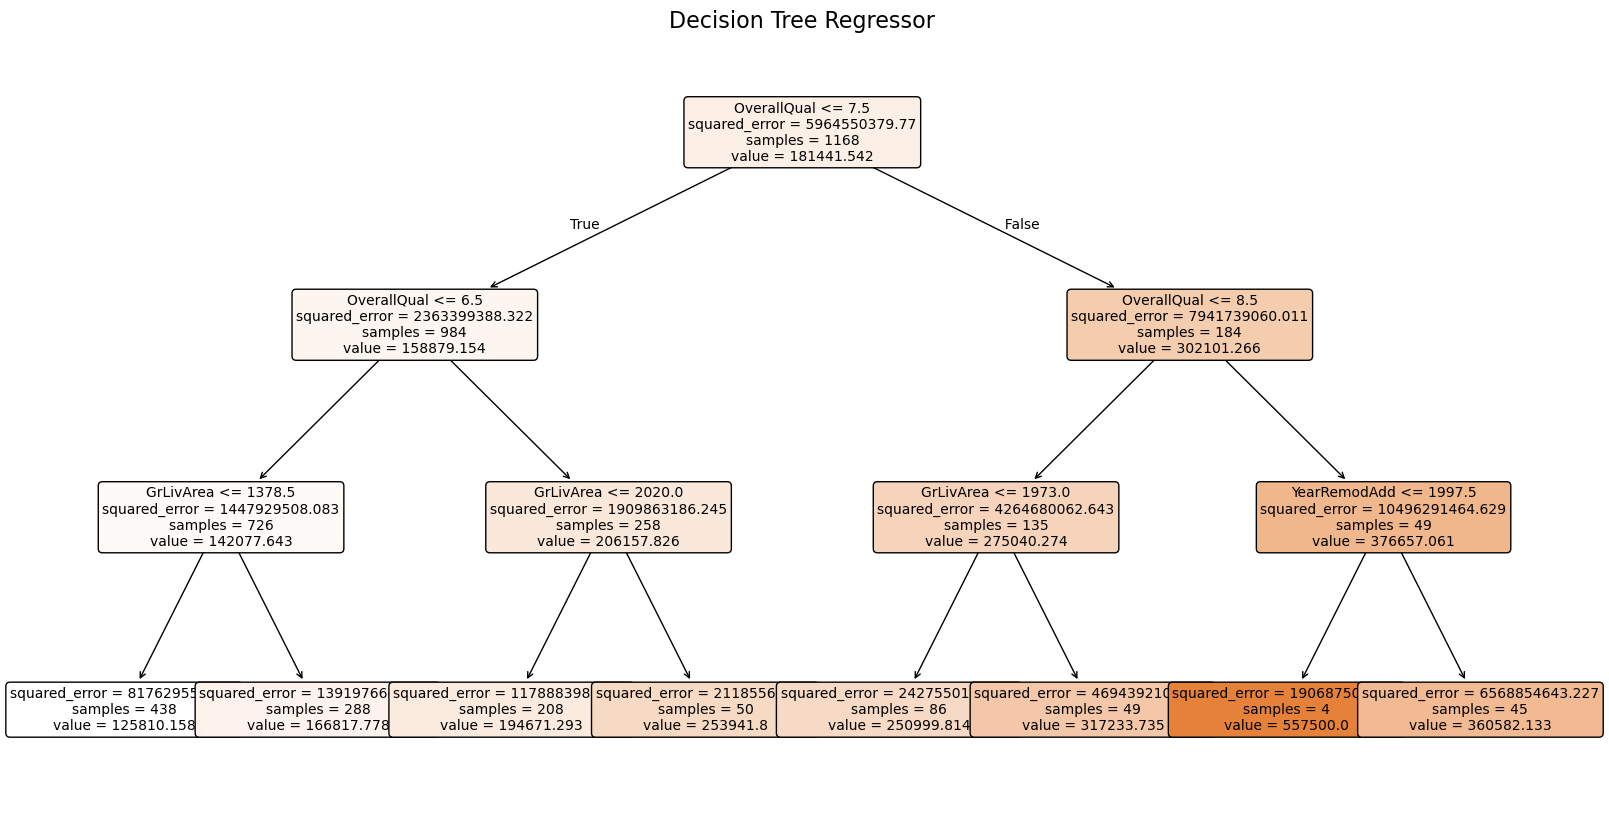

In [28]:
plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=X_train.columns.tolist(),  
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Regressor", fontsize=16)
plt.show()

In [132]:
# Теперь обучим модель с применением кросс-валидации
model_new = tree.DecisionTreeRegressor(random_state=42)

In [134]:
parametrs = {'max_depth': range(1, 100)}

In [136]:
grid_search_cv_model = GridSearchCV(model_new, parametrs, cv=5, n_jobs=-2)

In [138]:
grid_search_cv_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-2,
             param_grid={'max_depth': range(1, 100)})

In [140]:
grid_search_cv_model.best_params_

{'max_depth': 5}

In [142]:
best_model = grid_search_cv_model.best_estimator_

In [144]:
y_pred = best_model.predict(X_test)

In [146]:
# Среднеквадратическая ошибка. Корень от нее показывает на сколько в среднем отклоняется цена
# Значит отклонения от реальной цены в среднем +-(1393586187.3)^0,5, т.е. +-37 329$
mean_squared_error(y_test, y_pred)

1393586187.342247

In [148]:
# Коэф. детерминации: 1 - идеально, 0 - Модель работает как простое среднее значение, <0 очень плохо
r2_score(y_test, y_pred)

0.8183146127427473

In [150]:
# Можно и таким способом оценивать точность модели, также возвращается коэф. детерминации
grid_search_cv_model.score(X_test, y_test)

0.8183146127427473

In [152]:
# Коэф. детерминации для обучающей выборки
grid_search_cv_model.score(X_train, y_train)

0.8596690182069692

# RandomForestRegressor

In [160]:
from sklearn.ensemble import RandomForestRegressor

In [162]:
rf = RandomForestRegressor(random_state=42)

In [220]:
parametrs_rf = {'n_estimators': [100, 200],
               'max_depth': [10, 20]}

In [222]:
grid_search_cv_rf = GridSearchCV(rf, parametrs_rf, cv=5, n_jobs=-2)

In [224]:
grid_search_cv_rf.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-2,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 200]})

In [226]:
best_rf = grid_search_cv_rf.best_estimator_

In [228]:
best_rf.score(X_train, y_train)

0.9779723527181168

In [230]:
best_rf.score(X_test, y_test)

0.8962829491667617

In [232]:
y_pred_rf = best_rf.predict(X_test)

In [238]:
# Среднеквадратическое отклонение
round((mean_squared_error(y_test, y_pred_rf)) ** 0.5, 2)

28205.38

## Коэффициент детерминации выше у RandomForestRegressor (0.896), чем у DecisionTreeRegressor (0.818), что значит, что RandomForest лучше справляется с предсказанием значений на тестовой выборке